<a href="https://colab.research.google.com/github/parul-2718/ERC-20/blob/master/shashi_Network_science_ASS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [147]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tarfile
from collections import Counter

### Q1

## Data read / Description

In [148]:
df=pd.read_csv('bio-CE-HT.edges', sep=' ', header= None)

df.columns=['start','end','weight']

data=[]
start=df["start"]
end=df["end"]
for i in range(len(start)):
    data.append(start[i])
    data.append(end[i])
data=np.asarray(data)

edges =len(data)/2
print("Edges in graph ",edges)

nodes = len(np.unique(data))
print("Nodes in graph ",nodes)

print(df.head())


Edges in graph  2985.0
Nodes in graph  2617
   start  end    weight
0      0    1  2.742082
1      1    2  1.846247
2      1    3  1.846247
3      4    5  2.553371
4      6    7  2.094465


## Data Representations (A)


In [149]:
adjacency_list={}
adjacency_matrix=[]
edge_list=[]
for i in range (0, len(data),2):
    if data[i] in adjacency_list:
        adjacency_list[data[i]].append(data[i+1])    
    else :
        adjacency_list[data[i]]=[]
    
    if data[i+1] in adjacency_list:
        adjacency_list[data[i+1]].append(data[i])
    else :
        adjacency_list[data[i+1]]=[]


for i in range(nodes):
  adjacency_matrix.append(np.zeros(nodes))

adjacency_matrix=np.asarray(adjacency_matrix)
print(adjacency_matrix.shape)

for i in range(0,len(data),2 ):
  adjacency_matrix[data[i]][data[i+1]]=1
  adjacency_matrix[data[i+1]][data[i]]=1
  edge_list.append([data[i],data[i+1]])
  edge_list.append([data[i+1],data[i]])
   
print("Adjacency matrix")
print(adjacency_matrix)


edge_list.sort()
print("Edge_list")
print(edge_list)

#####################################################################


(2617, 2617)
Adjacency matrix
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Edge_list
[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [2, 337], [2, 338], [3, 1], [3, 523], [3, 848], [3, 1082], [3, 1136], [4, 5], [5, 4], [5, 340], [5, 344], [5, 703], [5, 1180], [5, 1488], [5, 2482], [6, 7], [7, 6], [7, 67], [7, 278], [7, 424], [7, 442], [7, 531], [7, 756], [7, 971], [7, 1095], [7, 1235], [7, 1289], [7, 1333], [7, 1503], [7, 1544], [7, 1554], [7, 1663], [7, 1694], [7, 1741], [7, 1820], [7, 1827], [7, 1871], [7, 1883], [7, 1887], [7, 2032], [7, 2071], [7, 2080], [7, 2083], [7, 2086], [7, 2114], [7, 2262], [7, 2279], [7, 2293], [7, 2305], [7, 2316], [7, 2403], [7, 2416], [7, 2466], [7, 2491], [7, 2525], [7, 2541], [7, 2561], [7, 2567], [7, 2568], [7, 2569], [8, 9], [8, 10], [9, 8], [9, 302], [10, 8], [10, 1200], [10, 1743], [10, 2167], [11, 12], [11, 13], [11, 14], [11, 15], [12, 11], [12

 Sparseness of network (C)


In [150]:
num_edges=len(edge_list)/2
total_edges= nodes*(nodes-1)/2

sparseness= num_edges/total_edges
print("Sparseness",sparseness)
print( "Network is sparse as->", "No of edges:" , no_of_edges ,"<  total_edges:" , total_edges  )

Sparseness 0.000872032897112388
Network is sparse as-> No of edges: 1648.0 <  total_edges: 3423036.0


Average degree (D)


In [151]:
print("average degree: " , num_edges*2/nodes)

average degree:  2.281238058846007


## Scaled degree distribution, pk × k.

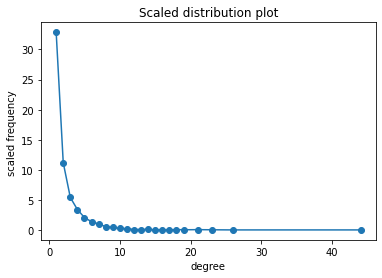

In [152]:
adjacency_matrix=np.asarray(adjacency_matrix)
def degreeDistribution(adjacency_matrix):    
    countNo=Counter(adjacency_matrix.sum(axis=0))
    degree,countValues=zip(*countNo.items()) 
    x=np.asarray(degree)
    y=np.asarray(countValues)
    return x,y

x,y =degreeDistribution(adjacency_matrix)
 
zipped = list(zip(x,y))

res = sorted(zipped, key = lambda x: x[0]) 
scaled_x=[]
scaled_y=[]
for i in range(len(res)):
    scaled_x.append(res[i][0])
    scaled_y.append(res[i][1])
    
plt.title("Scaled distribution plot")
plt.xlabel("degree")
plt.ylabel("scaled frequency ")
plt.plot(scaled_x, scaled_y/max(scaled_x),marker='o')

## Clustering Coefficient

In [153]:
copy=adjacency_matrix.copy()

for i in range (len (copy)):
  for j in range (len (copy)):
    if i ==j :
      copy[i][j]=0

clustering_coeff=[]
for i in range (len (copy )):
  count=0
  elem=[]
  for j in range(len(copy[i])):
    if copy[i][j]==1:
      elem.append(j)
 
  for p in elem:
    for e in elem:
      if copy[p][e]==1:
        count=count+1
  count=count/2   # links 

  n = copy[i].sum(axis=0) # neighbours 
  clustering_coeff.append ( 2* count /(n*(n-1) ))
coeff=np.nan_to_num(np.asarray(clustering_coeff)).mean()
print("Average clustering coefficient: ", coeff)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


Average clustering coefficient:  0.008205577480004866


## Average Path Length and Diameter

In [154]:
def bfs_algorithm(adjacency_matrix):
    d = 0
    tp = 0
    np =0
    
    for i in range(len(adjacency_matrix)):
        v = [False]*len(adjacency_matrix)
        q = []
        path = {}
        v[i]=True
        q.append(i) 
        path[i] = 0

        while(len(q)>0):
            front = q.pop(0)
            for j in range(len(adjacency_matrix)):
                if(adjacency_matrix[front][j]==1):
                  if j>front:
                    if v[j]==False:
                      q.append(j)
                      v[j]=True

                      path[j] = path[front]+1
                      tp = tp+path[j]
                      d = max(d,path[j])
                      np = np+1
   
   
    return tp/np,d


AverageLength , Diameter =bfs_algorithm(adjacency_matrix)
print("Diameter-->", Diameter)
print("Average path length -->", AverageLength)


Diameter--> 11
Average path length --> 3.1569255950351223


## Q3


In [155]:
df3=pd.read_csv('bio-SC-TS.edges', sep=' ', header= None)

df3.columns=['start','end','weight']

data3=[]
start=df3["start"]
end=df3["end"]
for i in range(len(start)):
    data3.append(start[i])
    data3.append(end[i])
data3=np.asarray(data3)

edges3 =len(data3)/2
print("Edges in graph ",edges)

nodes3 = len(np.unique(data3))
print("Nodes in graph ",nodes)

print(df3.head())


Edges in graph  2985.0
Nodes in graph  2617
   start  end    weight
0      0    1  3.215450
1      2    3  3.264063
2      4    5  3.326840
3      4    6  3.289746
4      4    7  3.340805


In [156]:
adjacency_matrix3=[] 
copy=[]
for i in range(nodes3):
  adjacency_matrix3.append(np.zeros(nodes3))

for i in range(df3.shape[0]):
    adjacency_matrix3[int(df3.iloc[i][0])][int(df3.iloc[i][1])]=df3.iloc[i][2]
    adjacency_matrix3[int(df3.iloc[i][1])][int(df3.iloc[i][0])]=df3.iloc[i][2]

for i in range(nodes3):
    copy.append(np.zeros(nodes3))

for i in range(int(edges3)):
    copy[int(df3.iloc[i][0])][int(df3.iloc[i][1])]=1
    copy[int(df3.iloc[i][1])][int(df3.iloc[i][0])]=1   

### Lineplot

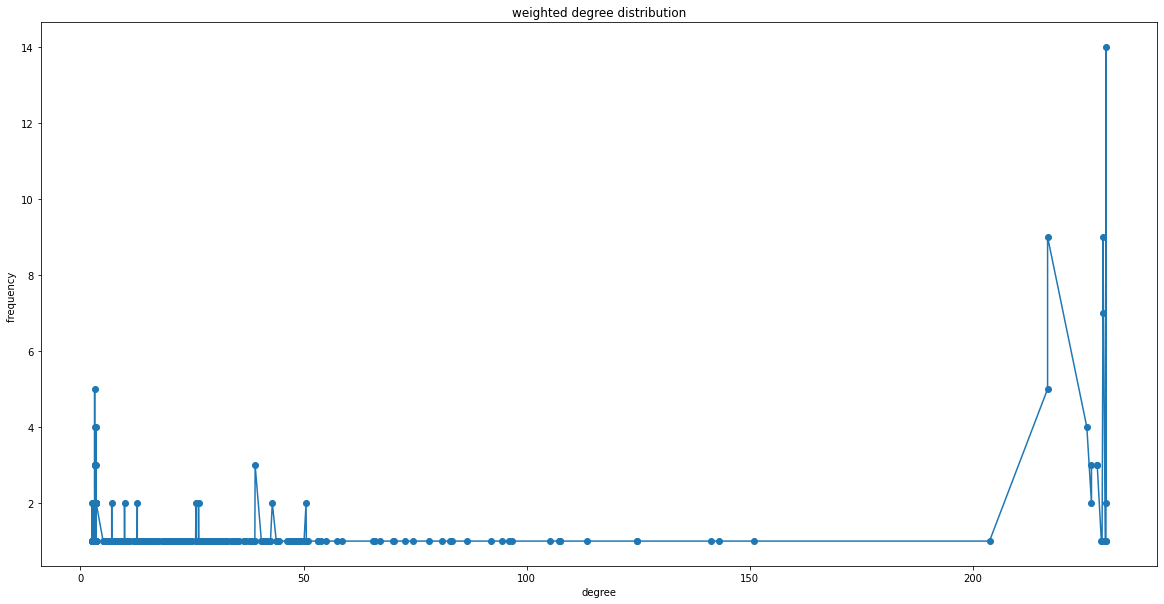

In [157]:
adjacency_matrix3=np.asarray(adjacency_matrix3)
x,y =degreeDistribution(adjacency_matrix3)
 
zipped3 = list(zip(x,y)) 
res = sorted(zipped3, key = lambda x: x[0]) 
scaled_x3=[]
scaled_y3=[]

plt.figure(figsize=(20,10))
for i in range(len(res)):
    scaled_x3.append(res[i][0])
    scaled_y3.append(res[i][1])

plt.title("weighted degree distribution")
plt.xlabel("degree")
plt.ylabel("frequency ")
plt.plot(scaled_x3, scaled_y3,marker='o')

### Histogram

Text(0.5, 1.0, 'Histogram: Weighted Degree Distribution ')

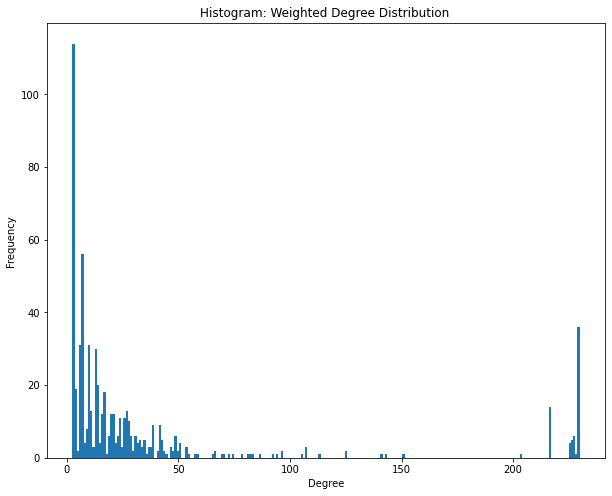

In [158]:
plt.figure(figsize = (10,8))

plt.hist(adjacency_matrix3.sum(axis=0), bins=int(max(adjacency_matrix3.sum(axis=0))) )
plt.ylabel("Frequency ")
plt.xlabel("Degree")

plt.title("Histogram: Weighted Degree Distribution ")

### Q3-b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


clustering coefficient:  0.47123869727317824


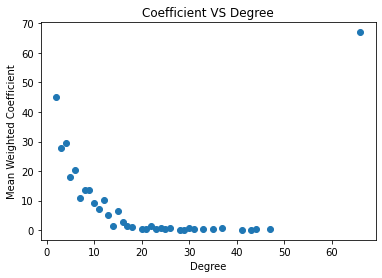

In [159]:
mat=adjacency_matrix3.copy()



for i in range (len (mat)):
  for j in range (len (mat)):
    if i ==j :
      adjacency_matrix3[i][j]=0

clustering_coeff=[]
for i in range (len(mat)):
  count=0
  elem=[]
  for j in range(len(mat[i])):
    if adjacency_matrix3[i][j]>0:
      elem.append(j)
 
  for p in elem:
    for e in elem:
      if adjacency_matrix3[p][e]>0:
        count=count+1
  count=count/2  

  n = copy[i].sum(axis=0)  
  clustering_coeff.append( 2* count /(n*(n-1) ))
coeff=np.nan_to_num(np.asarray(clustering_coeff)).mean()
print("clustering coefficient: ", coeff)

degree=np.asarray(copy).sum(axis=0)
dictionary={}
for i in range(len(degree)):
    if degree[i] in dictionary.keys():
        dictionary[degree[i]].append(clustering_coeff[i])
    else:
        dictionary[degree[i]]=[clustering_coeff[i]]


plt.scatter(dictionary.keys(), [np.sum(x) for x in dictionary.values()])

plt.xlabel('Degree')
plt.ylabel('Mean Weighted Coefficient')
plt.title('Coefficient VS Degree')
plt.show()

## Q4

## Gilbert random graph

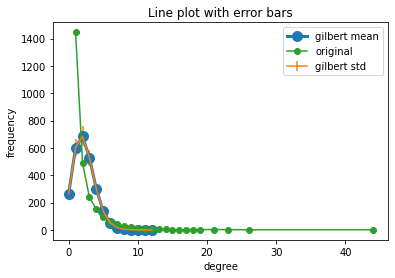

In [160]:
from random import *
probability= 2* edges/ (nodes*(nodes-1))

def generate_gilbert_graph(nodes, edges):
    adjacency_matrix=[]
    for i in range(nodes):
      adjacency_matrix.append(np.zeros(nodes))

    for i in range (nodes):
        for j in range(i):
            if i!=j and random() < probability:
                  adjacency_matrix[i][j]=1
                  adjacency_matrix[j][i]=1
    
    return adjacency_matrix


### instances creation
counter={}
for i in range(100):
    network_1=generate_gilbert_graph(nodes,edges)
    network_1=np.asarray(network_1)
    x,y=degreeDistribution(network_1)
    
    for i in range(len(x)):
        if x[i] in counter:
            counter[x[i]].append(y[i])
        else:
            counter[x[i]]=[]
            counter[x[i]].append(0)

        
##calculating mean and standard deviation 
x=[]
mean_=[]
std_=[]
for i in counter.keys():
    x.append(i)
for i in counter.keys():
    mean_.append(np.mean(counter[i]))
for i in counter.keys():
    std_.append(np.std(counter[i]))

###sort lists  
zipped = zip(x, mean_ , std_) 
zipped = list(zipped) 
res = sorted(zipped, key = lambda x: x[0]) 
x=[]
mean_=[]
std_=[]
for i in range(len(res)):
    x.append(res[i][0])
    mean_.append(res[i][1])
    std_.append(res[i][2])
          

plt.plot(x, mean_  ,  linewidth = 3, marker='o',  markersize=10) 
plt.errorbar(x,mean_ , yerr = std_)
plt.xlabel('degree')
plt.ylabel('frequency')
plt.title('Line plot with error bars')

plt.plot(scaled_x, scaled_y,marker='o')
plt.legend(['gilbert mean','original','gilbert std'])
